In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [2]:
categories = os.listdir("labelled")
categories

['bramka',
 'closeup2_group',
 'closeup2_single',
 'closeup_group',
 'closeup_single',
 'crowd',
 'faul',
 'playingfield']

In [3]:
X, X_names = [], []
y = []

for category in categories:
    imgs = os.listdir(f"labelled/{category}")
    for img in imgs:
        X_names.append(img)
        X.append(cv2.imread(f"labelled/{category}/{img}"))
        y.append(categories.index(category))    

In [4]:
len(X)

1729

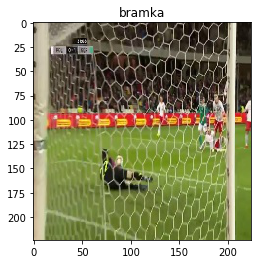

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

id_ = 72

img_path = f"{os.getcwd()}\\labelled\\{categories[y[id_]]}\\{X_names[id_]}"

plt.imshow(Image.open(img_path))
plt.title(categories[y[id_]])
plt.show()

In [6]:
from random import shuffle
import random

random.seed(22)
data = []

for i in range(len(X)):
    data.append([X[i], y[i]])
    
shuffle(data)

In [7]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(1729, 224, 224, 3)
(1729,)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly

model = Sequential()
model.add(ly.Conv2D(96, (11, 11), strides=(4, 4), input_shape=(224, 224, 3), activation="relu"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))
          
model.add(ly.Conv2D(256, (5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(ly.Conv2D(384, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
          
model.add(ly.Conv2D(384, (1, 1), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
          
model.add(ly.Conv2D(256, (1, 1), strides=(1,1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(ly.Flatten())
          
model.add(ly.Dense(4096, activation="relu"))
model.add(ly.Dropout(0.5))

model.add(ly.Dense(4096, activation="relu"))
model.add(ly.Dropout(0.5))
          
model.add(ly.Dense(len(categories), activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)      

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [38]:
history = model.fit(X, y, epochs=150)

Epoch 1/150
55/55 [==============================] - 4s 73ms/step - loss: 2.1309 - accuracy: 0.5685
Epoch 2/150
55/55 [==============================] - 4s 73ms/step - loss: 1.4056 - accuracy: 0.6530
Epoch 3/150
55/55 [==============================] - 4s 72ms/step - loss: 1.1697 - accuracy: 0.6912
Epoch 4/150
55/55 [==============================] - 4s 73ms/step - loss: 0.9671 - accuracy: 0.7264
Epoch 5/150
55/55 [==============================] - 4s 73ms/step - loss: 0.8637 - accuracy: 0.7507
Epoch 6/150
55/55 [==============================] - 4s 73ms/step - loss: 0.9084 - accuracy: 0.7420
Epoch 7/150
55/55 [==============================] - 4s 70ms/step - loss: 0.7269 - accuracy: 0.7802
Epoch 8/150
55/55 [==============================] - 4s 72ms/step - loss: 0.8608 - accuracy: 0.7571
Epoch 9/150
55/55 [==============================] - 4s 73ms/step - loss: 0.6675 - accuracy: 0.7854
Epoch 10/150
55/55 [==============================] - 4s 70ms/step - loss: 0.6496 - accuracy: 0.7935

55/55 [==============================] - 4s 70ms/step - loss: 0.1063 - accuracy: 0.9636
Epoch 82/150
55/55 [==============================] - 4s 71ms/step - loss: 0.1167 - accuracy: 0.9584
Epoch 83/150
55/55 [==============================] - 4s 70ms/step - loss: 0.0890 - accuracy: 0.9693
Epoch 84/150
55/55 [==============================] - 4s 70ms/step - loss: 0.0943 - accuracy: 0.9699
Epoch 85/150
55/55 [==============================] - 4s 70ms/step - loss: 0.0845 - accuracy: 0.9699
Epoch 86/150
55/55 [==============================] - 4s 71ms/step - loss: 0.1046 - accuracy: 0.9659
Epoch 87/150
55/55 [==============================] - 4s 71ms/step - loss: 0.1614 - accuracy: 0.9398
Epoch 88/150
55/55 [==============================] - 4s 69ms/step - loss: 0.1131 - accuracy: 0.9572
Epoch 89/150
55/55 [==============================] - 4s 70ms/step - loss: 0.0898 - accuracy: 0.9693
Epoch 90/150
55/55 [==============================] - 4s 70ms/step - loss: 0.1447 - accuracy: 0.9439
Epo

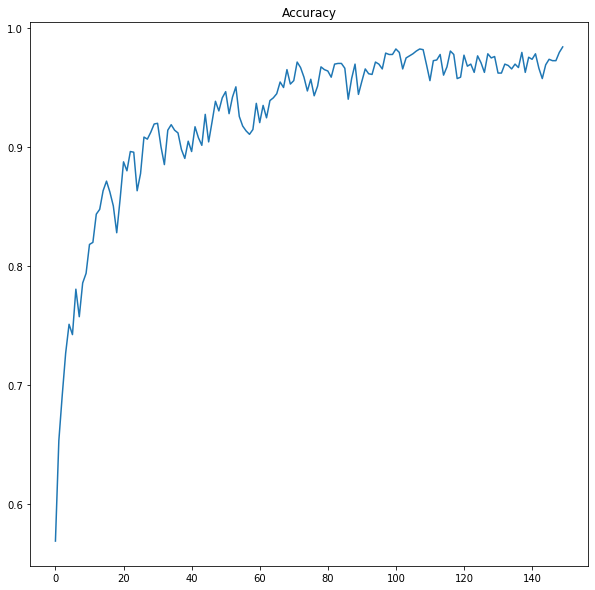

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.title("Accuracy")
plt.show()

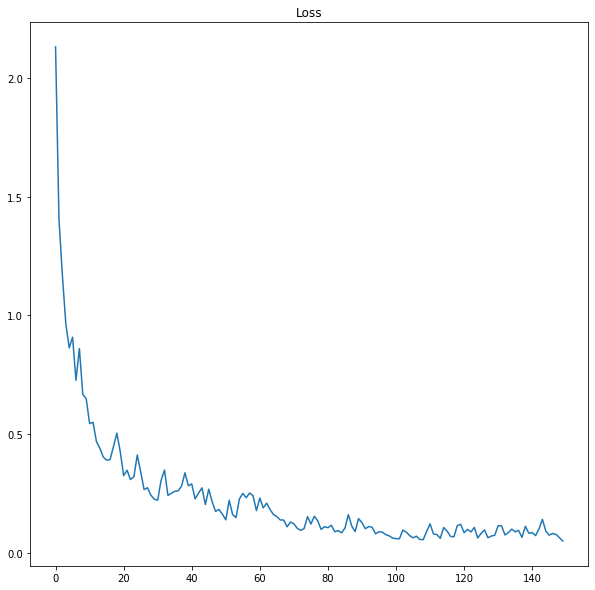

In [40]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [196]:
from tqdm.notebook import tqdm
imgs = [img for img in os.listdir("frames") if img.split(".")[-1] == "jpg"]
imgs = imgs[:7000]

In [197]:
len(imgs)

3979

In [198]:
img_names = []
imgs_to_use = []
# imgs_to_use = np.array([])

for i in tqdm(imgs):
    img = cv2.imread(f"frames/{i}")
    imgs_to_use.append(img)
    img_names.append(i)    

In [199]:
imgs_reshaped = np.array(imgs_to_use).reshape(-1, 224, 224, 3)
imgs_reshaped.shape

(3979, 224, 224, 3)

In [200]:
predicted_labels = model.predict(imgs_reshaped)

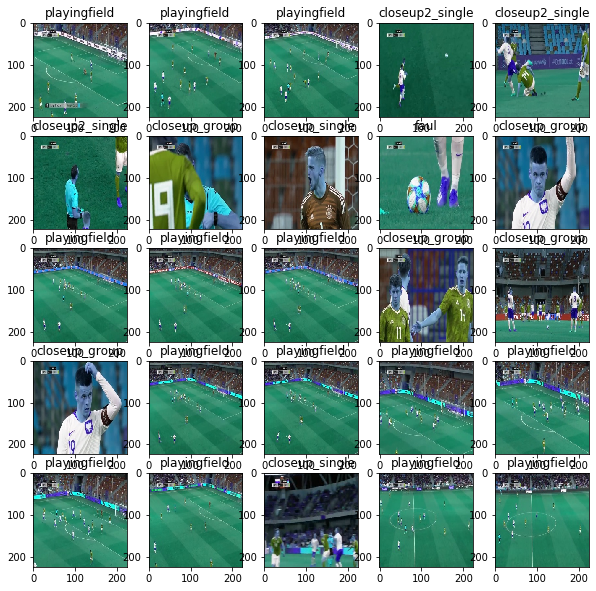

In [203]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 10, 10

cols = 5
rows = cols

fig, ax = plt.subplots(nrows=rows, ncols=cols)
k = 0
for i in range(rows):
    for j in range(cols):
        lab = categories[np.argmax(predicted_labels[k])]
        ax[i, j].set_title(lab)
        ax[i, j].imshow((imgs_reshaped[k]).astype(np.uint8))
        k += 1
plt.show()

In [202]:
for i in range(len(img_names)):
    cat = categories[np.argmax(predicted_labels[i])]
    os.replace(f"frames/{img_names[i]}", f"test/{cat}/{img_names[i]}")

In [210]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
